# Data Cleaning

### BLS Data 

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
bls_1 = pd.read_csv('../data/BLS_data_2001_2019.csv')
bls_2 = pd.read_csv('../data/BLS_data_2020_2023.csv')
bls = pd.concat([bls_1,bls_2])
bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy
0,0,2019,December,256.974,2.285130,3.6,151792.0,1.327067,NaN,NaN,...,259.823,1.807531,2.587,7.166529,125.0,0.482315,99.473,-0.609494,234.703,1.553353
1,1,2019,November,257.208,2.051278,3.6,151666.0,1.366109,NaN,NaN,...,259.467,2.000165,2.620,-1.909397,124.7,-1.188590,99.034,-0.429314,234.370,1.621645
2,2,2019,October,257.346,1.764043,3.6,151458.0,1.292760,NaN,NaN,...,259.632,2.073456,2.673,-7.412539,124.5,-2.961808,99.071,0.248925,233.939,1.587171
3,3,2019,September,256.759,1.711305,3.5,151358.0,1.337029,NaN,NaN,...,258.943,1.788571,2.630,-8.458058,125.0,-2.114330,99.066,0.479750,233.387,1.511006
4,4,2019,August,256.558,1.749780,3.6,151155.0,1.260099,NaN,NaN,...,258.410,1.705389,2.655,-7.232704,124.9,-2.115987,99.263,0.391399,233.239,1.646910


In [85]:
bls.shape

(384, 30)

In [86]:
# remove quarterly data and leave only monthly 
months = ['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January']

bls = bls[bls['periodName'].isin(months)]
bls['month'] = bls['periodName']

bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy,month
0,0,2019,December,256.974,2.285130,3.6,151792.0,1.327067,NaN,NaN,...,1.807531,2.587,7.166529,125.0,0.482315,99.473,-0.609494,234.703,1.553353,December
1,1,2019,November,257.208,2.051278,3.6,151666.0,1.366109,NaN,NaN,...,2.000165,2.620,-1.909397,124.7,-1.188590,99.034,-0.429314,234.370,1.621645,November
2,2,2019,October,257.346,1.764043,3.6,151458.0,1.292760,NaN,NaN,...,2.073456,2.673,-7.412539,124.5,-2.961808,99.071,0.248925,233.939,1.587171,October
3,3,2019,September,256.759,1.711305,3.5,151358.0,1.337029,NaN,NaN,...,1.788571,2.630,-8.458058,125.0,-2.114330,99.066,0.479750,233.387,1.511006,September
4,4,2019,August,256.558,1.749780,3.6,151155.0,1.260099,NaN,NaN,...,1.705389,2.655,-7.232704,124.9,-2.115987,99.263,0.391399,233.239,1.646910,August


In [87]:
# drop null columns and nominal inflaiton columns leaving yoy incflation, unemployment and hourly earnings

bls.drop(columns=['ULC', 'ULC_yoy', 'Unnamed: 0', 'periodName', 'NF Employment',
       'NF Employment_yoy', 'PPI', 'PPI_yoy', 'Shelter', 'Energy', 'Medical Care', 'Hourly earnings',
        'Food', 'Gasoline', 'Imports','New & Used Vehicles', 'All Items Less Food & Shelter'
        ], inplace=True)
bls.head()

,year,CPI,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,New & Used Vehicles_yoy,All Items Less Food & Shelter_yoy,month
0,2019,256.974,2.285130,3.6,2.976407,3.226840,3.437022,4.619287,1.807531,7.166529,0.482315,-0.609494,1.553353,December
1,2019,257.208,2.051278,3.6,3.316327,3.315695,-0.590061,4.272018,2.000165,-1.909397,-1.188590,-0.429314,1.621645,November
2,2019,257.346,1.764043,3.6,3.142126,3.355015,-4.166427,4.292580,2.073456,-7.412539,-2.961808,0.248925,1.587171,October
3,2019,256.759,1.711305,3.5,3.111274,3.506051,-4.751840,3.418900,1.788571,-8.458058,-2.114330,0.479750,1.511006,September
4,2019,256.558,1.749780,3.6,3.419118,3.352060,-4.389285,3.384868,1.705389,-7.232704,-2.115987,0.391399,1.646910,August


In [88]:
# convert year column to string
bls['year'] = bls['year'].astype(str)

In [89]:
bls.isna().sum()

year                                  0
CPI                                   0
CPI_yoy                              12
Unemployment                          0
Hourly earnings_yoy                  86
Shelter_yoy                          12
Energy_yoy                           12
Medical Care_yoy                     12
Food_yoy                             12
Gasoline_yoy                         12
Imports_yoy                          12
New & Used Vehicles_yoy              12
All Items Less Food & Shelter_yoy    12
month                                 0
dtype: int64

In [90]:
# the year 2000 are nulls in almost all columns 
nan_year_bls = bls[bls['CPI_yoy'].isna()]
nan_year_bls

,year,CPI,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,New & Used Vehicles_yoy,All Items Less Food & Shelter_yoy,month
228,2000,174.0,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December
229,2000,174.1,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November
230,2000,174.0,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,October
231,2000,173.7,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,September
232,2000,172.8,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,August
233,2000,172.8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July
234,2000,172.4,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
235,2000,171.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May
236,2000,171.3,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April
237,2000,171.2,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March


In [91]:
# find nan in hourly earnings data 

nan_hourly_earn_bls = bls[bls['Hourly earnings_yoy'].isna()]
nan_hourly_earn_bls['year'].value_counts()

year
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
2007     2
Name: count, dtype: int64

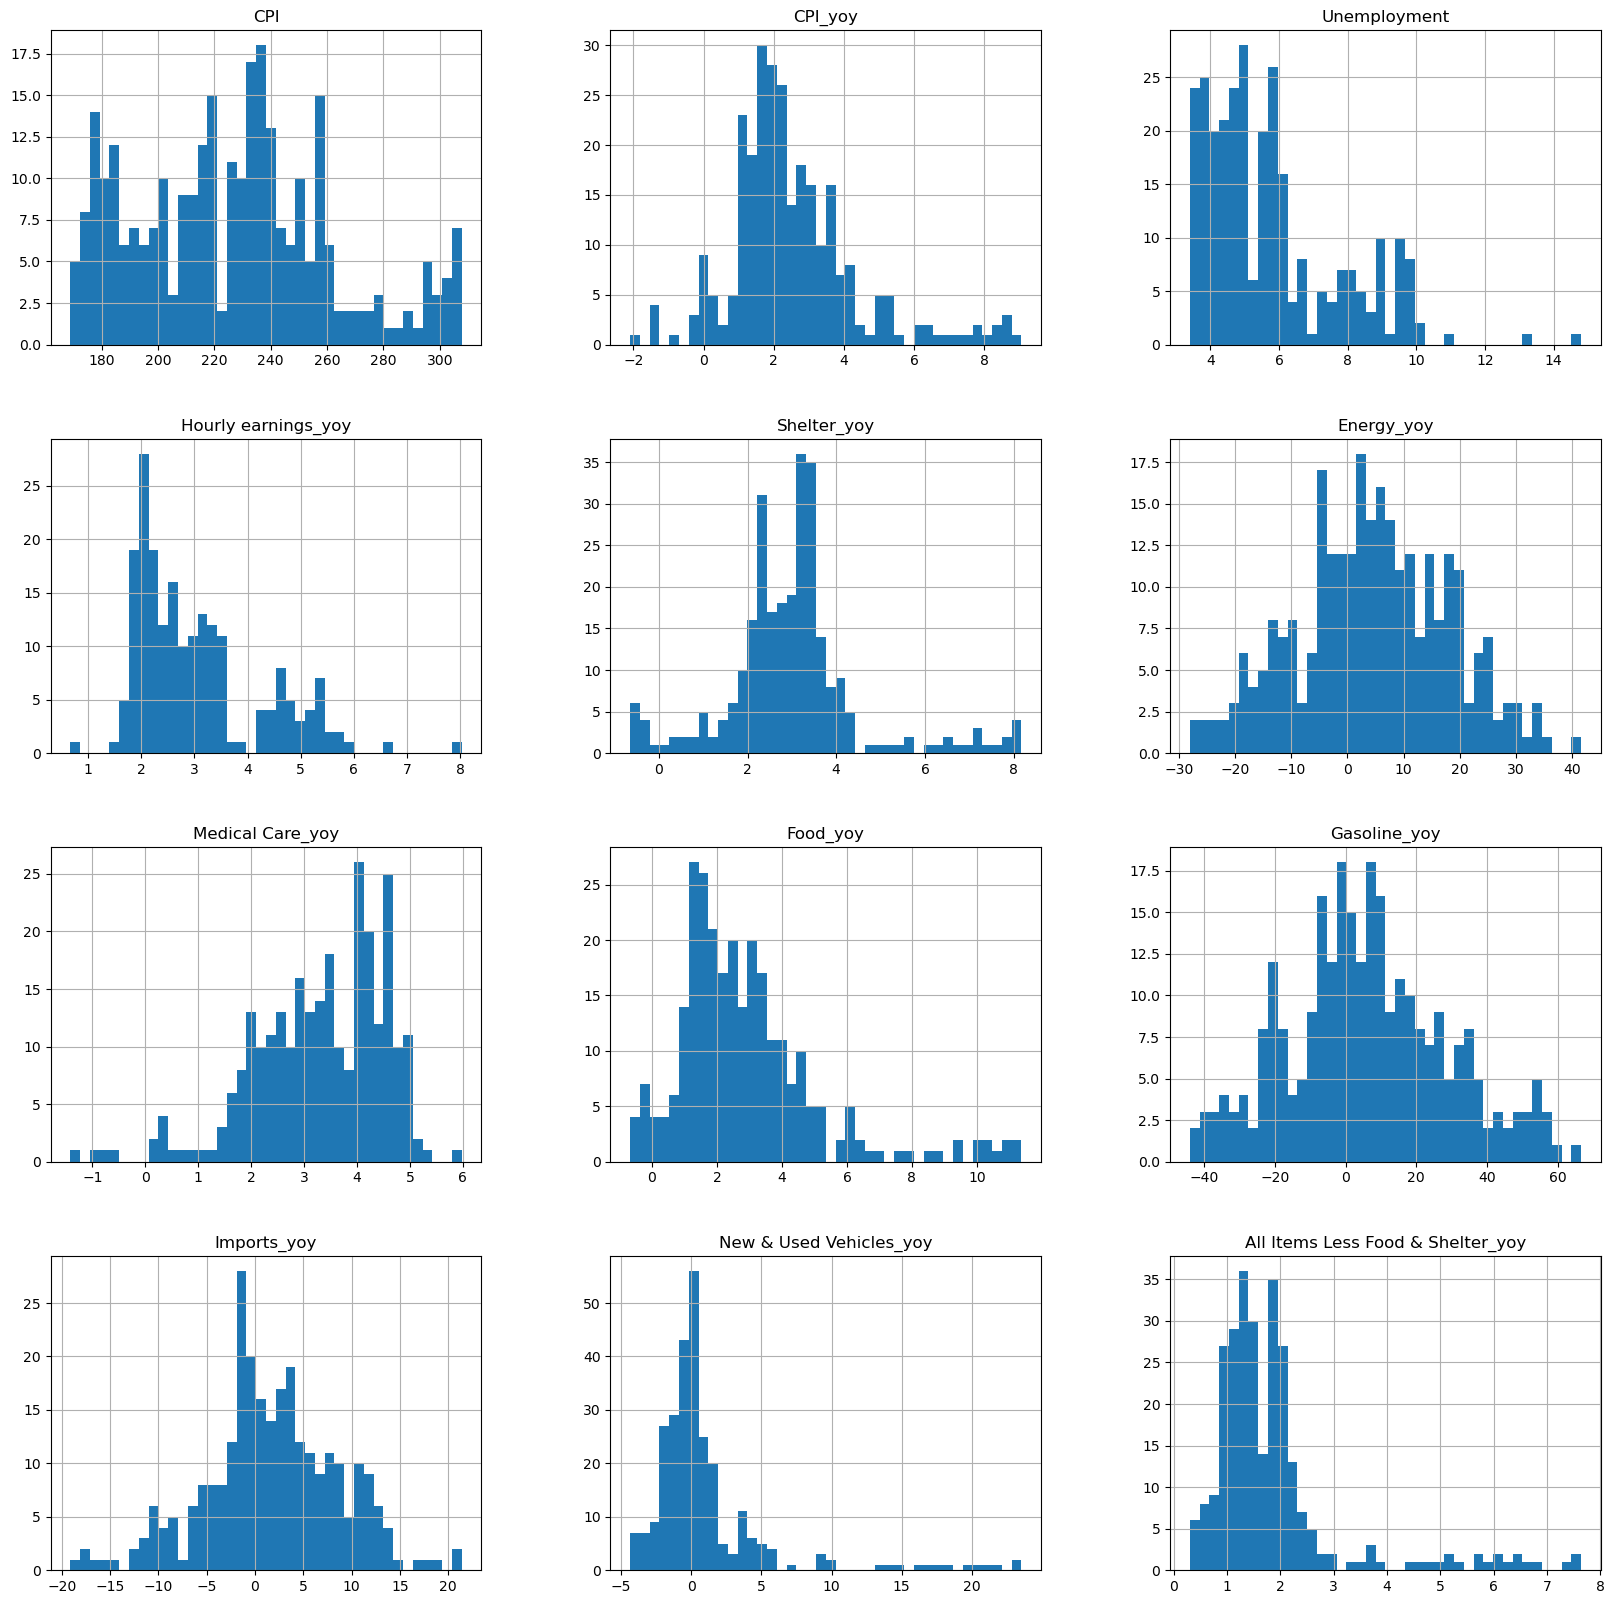

In [92]:
bls.hist(bins = 40, figsize = (20, 20));

**Observations:**
- CPI yoy has a peak around 2% as to be expected. 
- Import centre near 0 
- vehicles seem to centre around 0 
- Imports yoy, gasloine yoy, hourly earnings yoy, energy yoy appear to have double peaks. 
- Unemployment right skewed with a long tail showing some periods with unusually high unemployment rate.
- Energy and gasoline have very similar distributions as to be expected as both are heavily dependant on oil prices.

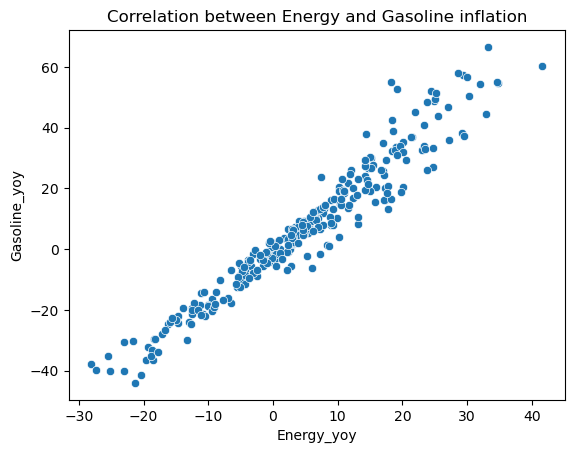

In [93]:
# plot relationship between energy and gasoline  
sns.scatterplot(bls, x = 'Energy_yoy', y ='Gasoline_yoy', legend = None)
plt.title('Correlation between Energy and Gasoline inflation');

In [94]:
bls.describe()

,CPI,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,New & Used Vehicles_yoy,All Items Less Food & Shelter_yoy
count,288.000000,276.000000,288.000000,202.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,226.432326,2.528411,5.763542,3.048984,3.000028,4.517148,3.298467,2.911176,6.401228,1.722039,1.126088,1.880349
std,34.816007,1.834622,1.971687,1.195881,1.546201,13.446904,1.234076,2.245164,22.757070,7.015737,4.588820,1.316439
min,168.800000,-2.097161,3.400000,0.666445,-0.649093,-28.093208,-1.417903,-0.678403,-44.072848,-19.118644,-4.369919,0.303587
25%,198.775000,1.513777,4.300000,2.125760,2.252884,-4.317146,2.528533,1.442390,-7.501760,-1.861140,-0.994445,1.165626
50%,226.777000,2.160308,5.200000,2.689661,2.988692,4.493116,3.465685,2.432628,5.089727,1.372079,0.052547,1.548247
75%,247.081000,3.258220,6.700000,3.497023,3.486291,14.287334,4.272099,3.694357,20.345503,6.500790,1.358399,2.024245
max,307.789000,9.059758,14.800000,8.027358,8.175182,41.623878,5.977259,11.370842,66.602871,21.399177,23.533280,7.639952


- Big outliers in energy_yoy - seen in high max and difference between mean and median. 
- Some outliers in food_yoy - seen in high max and difference between mean and median. 
- Gasoline_yoy, imports_yoy, energy_yoy and New & Used Vehicles_yoy - show negative inflation in some years. 
- Gasoline_yoy and energy_yoy have highest standard deviations and are likely correlated/connected by oil prices. 

In [95]:
bls.corr(numeric_only=True)['CPI_yoy'].sort_values(ascending=False)

CPI_yoy                              1.000000
Energy_yoy                           0.813378
All Items Less Food & Shelter_yoy    0.784644
Gasoline_yoy                         0.750454
Food_yoy                             0.709975
Imports_yoy                          0.704914
New & Used Vehicles_yoy              0.593531
Hourly earnings_yoy                  0.496653
Shelter_yoy                          0.473088
CPI                                  0.338108
Medical Care_yoy                     0.017462
Unemployment                        -0.428050
Name: CPI_yoy, dtype: float64

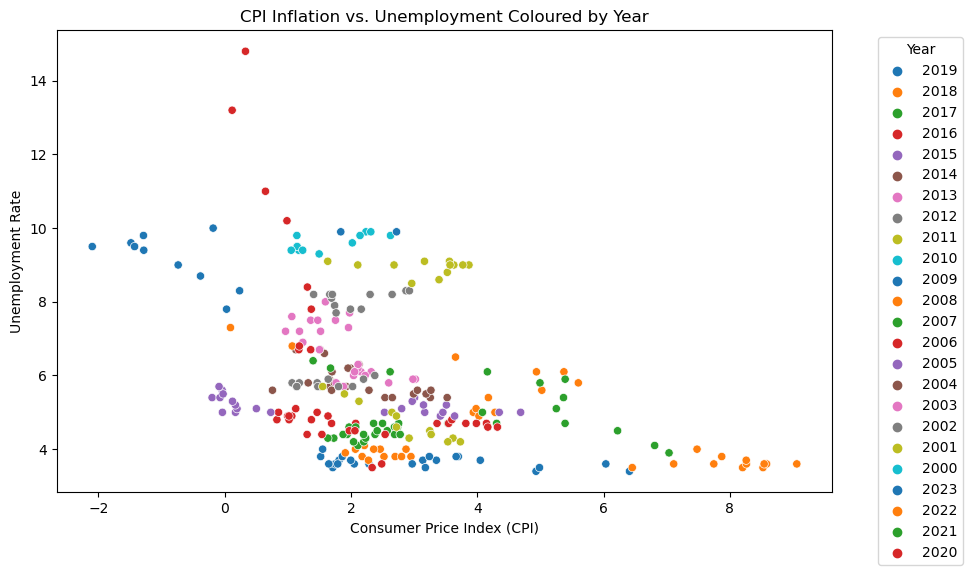

In [96]:
# create scatter plot of CPI yoy and unemployment 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bls, x='CPI_yoy', y='Unemployment', hue='year', palette="tab10", legend='full')

plt.title('CPI Inflation vs. Unemployment Coloured by Year')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Unemployment Rate')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

We can see the whats classically known as the philips curve relationship, as inflation rises unemployment falls, as unemployment rate increase inflation falls. However 2009 slightly obsucures that from being obviously visible with unusual deflationary period, as expected however during this deflationary period unemployment rate is high. 

In [97]:
bls.columns

Index(['year', 'CPI', 'CPI_yoy', 'Unemployment', 'Hourly earnings_yoy',
       'Shelter_yoy', 'Energy_yoy', 'Medical Care_yoy', 'Food_yoy',
       'Gasoline_yoy', 'Imports_yoy', 'New & Used Vehicles_yoy',
       'All Items Less Food & Shelter_yoy', 'month'],
      dtype='object')

In [98]:
bls.isna().sum()

year                                  0
CPI                                   0
CPI_yoy                              12
Unemployment                          0
Hourly earnings_yoy                  86
Shelter_yoy                          12
Energy_yoy                           12
Medical Care_yoy                     12
Food_yoy                             12
Gasoline_yoy                         12
Imports_yoy                          12
New & Used Vehicles_yoy              12
All Items Less Food & Shelter_yoy    12
month                                 0
dtype: int64

In [99]:
# check there is a month for every year
bls['year'].value_counts().sort_values(ascending=False)

year
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
2023    12
2022    12
2021    12
2020    12
Name: count, dtype: int64

In [100]:
bls['yearMonth'] = bls['year'] + '-' + bls['month']

In [101]:
bls.shape

(288, 15)

## Cleaning BEA Data 

In [102]:
bea = pd.read_csv('../data/BEA_data_2001_2023.csv')
bea.head()

,Unnamed: 0,TableName,SeriesCode,LineNumber,LineDescription,TimePeriod,METRIC_NAME,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,0,T20600,A065RC,1,Personal income,2001M01,Current Dollars,Level,6,"8,940,891",T20600
1,1,T20600,A065RC,1,Personal income,2001M02,Current Dollars,Level,6,"8,975,805",T20600
2,2,T20600,A065RC,1,Personal income,2001M03,Current Dollars,Level,6,"9,009,416",T20600
3,3,T20600,A065RC,1,Personal income,2001M04,Current Dollars,Level,6,"9,008,903",T20600
4,4,T20600,A065RC,1,Personal income,2001M05,Current Dollars,Level,6,"9,011,065",T20600


In [103]:
bea.isna().sum()

Unnamed: 0         0
TableName          0
SeriesCode         0
LineNumber         0
LineDescription    0
TimePeriod         0
METRIC_NAME        0
CL_UNIT            0
UNIT_MULT          0
DataValue          0
NoteRef            0
dtype: int64

In [104]:
bea.dtypes

Unnamed: 0          int64
TableName          object
SeriesCode         object
LineNumber          int64
LineDescription    object
TimePeriod         object
METRIC_NAME        object
CL_UNIT            object
UNIT_MULT           int64
DataValue          object
NoteRef            object
dtype: object

In [105]:
bea['LineDescription'].value_counts()

LineDescription
Personal income                                                                            276
To the rest of the world (net)                                                             276
Less: Contributions for government social insurance, domestic                              276
Less: Personal current taxes                                                               276
Equals: Disposable personal income                                                         276
Less: Personal outlays                                                                     276
Personal consumption expenditures                                                          276
Personal interest payments                                                                 276
Personal current transfer payments                                                         276
To government                                                                              276
Equals: Personal saving           

In [106]:
# metric name is 
bea['METRIC_NAME'].value_counts()

METRIC_NAME
Current Dollars    9936
Ratio               828
Chained Dollars     828
Persons             276
Name: count, dtype: int64

In [107]:
bea['CL_UNIT'].value_counts()

CL_UNIT
Level             11040
Percent change      828
Name: count, dtype: int64

In [108]:
# 6 is trillion, 3 is billion, 0 is as is 
bea['UNIT_MULT'].value_counts()

UNIT_MULT
6    9936
0    1656
3     276
Name: count, dtype: int64

In [109]:
bea['UNIT_MULT'] = bea['UNIT_MULT'].map({6: 1_000_000, 3 : 1_000, 0 : 1})
bea['UNIT_MULT'].value_counts()

UNIT_MULT
1000000    9936
1          1656
1000        276
Name: count, dtype: int64

In [110]:
bea['DataValue'] = bea['DataValue'].replace(',', '', regex=True).astype(float)
bea['DataValue']

0        8940891.0
1        8975805.0
2        9009416.0
3        9008903.0
4        9011065.0
           ...    
11863          0.0
11864         -0.1
11865          0.3
11866          0.5
11867          0.1
Name: DataValue, Length: 11868, dtype: float64

In [111]:
bea['value']= bea['DataValue'] * bea['UNIT_MULT']
bea['value'].describe()

count    1.186800e+04
mean     2.874035e+12
std      4.630306e+12
min     -1.520000e+01
25%      7.109800e+10
50%      8.006150e+11
75%      2.314122e+12
max      2.447176e+13
Name: value, dtype: float64

In [112]:
# make the month year column
bls['year'] = bls['year'].astype(str)
bea['year'] = bea['TimePeriod'].apply(lambda x: x[:4])
bea['year'].value_counts().sort_values(ascending=False)

year
2001    516
2002    516
2003    516
2004    516
2005    516
2006    516
2007    516
2008    516
2009    516
2010    516
2011    516
2012    516
2013    516
2014    516
2015    516
2016    516
2017    516
2018    516
2019    516
2020    516
2021    516
2022    516
2023    516
Name: count, dtype: int64

In [113]:
bea['TimePeriod'].value_counts()

TimePeriod
2001M01    43
2016M03    43
2016M09    43
2016M08    43
2016M07    43
           ..
2009M02    43
2009M03    43
2009M04    43
2009M05    43
2023M12    43
Name: count, Length: 276, dtype: int64

In [114]:
def get_month(row): 
    months = {'12' : 'December', '11' : 'November', '10' : 'October', '09' : 'September', '08' : 'August', '07' : 'July',
       '06' : 'June', '05' : 'May', '04' : 'April', '03': 'March', '02' : 'February', '01' : 'January'}
    monthNum = row[5:7]
    return months[monthNum]

bea['month'] = bea['TimePeriod'].apply(get_month)
bea['month'].value_counts()

month
January      989
February     989
March        989
April        989
May          989
June         989
July         989
August       989
September    989
October      989
November     989
December     989
Name: count, dtype: int64

In [115]:
# create year-month column to join data via 
bea['yearMonth'] = bea['year'] + '-' + bea['month']
bea.drop(columns=['Unnamed: 0', 'TableName', 'SeriesCode', 'LineNumber',
       'TimePeriod', 'METRIC_NAME', 'CL_UNIT', 'UNIT_MULT',
       'DataValue', 'NoteRef', 'year', 'month'], inplace=True)
bea.shape # check

(11868, 3)

In [116]:
# use the pivot function to reshape back to wide format
wide_bea = bea.pivot(index='yearMonth', columns='LineDescription', values='value').reset_index()
wide_bea.head()

LineDescription,yearMonth,Chained (2017) dollars,Compensation of employees,Current dollars,"Disposable personal income, chained (2017) dollars","Disposable personal income, current dollars",Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Equals: Disposable personal income,Equals: Personal saving,...,Proprietors' income with inventory valuation and capital consumption adjustments,Rental income of persons with capital consumption adjustment,Social security,Supplements to wages and salaries,To government,To the rest of the world (net),"Total, Billions of chained (2017) dollars",Unemployment insurance,Veterans' benefits,Wages and salaries
0,2001-April,35956.0,6.048838e+12,27034.0,-0.2,0.0,7.186470e+11,3.582320e+11,7.693797e+12,3.692820e+11,...,8.190360e+11,2.011120e+11,4.229760e+11,1.076880e+12,5.212400e+10,3.811300e+10,1.023306e+13,2.726400e+10,2.643600e+10,4.971959e+12
1,2001-August,36917.0,6.022934e+12,27866.0,1.7,1.6,7.312060e+11,3.572180e+11,7.958169e+12,5.174460e+11,...,8.537880e+11,2.048700e+11,4.266120e+11,1.088424e+12,5.339200e+10,3.916100e+10,1.054306e+13,3.057600e+10,2.647200e+10,4.934510e+12
2,2001-December,35943.0,6.048399e+12,27087.0,0.2,0.1,7.445590e+11,3.596110e+11,7.761452e+12,2.865960e+11,...,8.396280e+11,2.060480e+11,4.319280e+11,1.104170e+12,5.459200e+10,3.968800e+10,1.029890e+13,4.256400e+10,2.726400e+10,4.944228e+12
3,2001-February,35977.0,6.055399e+12,27000.0,0.1,0.3,7.128440e+11,3.581620e+11,7.672371e+12,3.506950e+11,...,8.082880e+11,1.969760e+11,4.205400e+11,1.071006e+12,5.152400e+10,3.733000e+10,1.022342e+13,2.535600e+10,2.607600e+10,4.984394e+12
4,2001-January,35962.0,6.022606e+12,26946.0,0.5,1.0,7.101100e+11,3.557660e+11,7.651692e+12,3.446980e+11,...,8.018280e+11,1.956380e+11,4.192080e+11,1.065876e+12,5.118800e+10,3.733000e+10,1.021174e+13,2.732400e+10,2.608800e+10,4.956730e+12


In [117]:
wide_bea['yearMonth']

0          2001-April
1         2001-August
2       2001-December
3       2001-February
4        2001-January
            ...      
271        2023-March
272          2023-May
273     2023-November
274      2023-October
275    2023-September
Name: yearMonth, Length: 276, dtype: object

In [118]:
bls['yearMonth']

0      2019-December
1      2019-November
2       2019-October
3     2019-September
4        2019-August
           ...      
43          2020-May
44        2020-April
45        2020-March
46     2020-February
47      2020-January
Name: yearMonth, Length: 288, dtype: object

## Cleaning Credit Card and Mortgage Data 

In [119]:
# this is the average cc rate 
cc_rate = pd.read_csv('../data/FRED_CC_RATE.csv')
cc_rate.head()

,DATE,TERMCBCCALLNS
0,1994-11-01,15.69
1,1994-12-01,.
2,1995-01-01,.
3,1995-02-01,16.10
4,1995-03-01,.


In [120]:
# this is the 30 year mortgage rate 
mortgage_rate = pd.read_csv('../data/FRED_MORTGAGE30US.csv')
mortgage_rate.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [121]:
cc_30day_overdue = pd.read_csv('../data/FRED_CC_BALS_30D_DUE.csv')
cc_30day_overdue.head()

,DATE,RCCCBBALDPD30P
0,2012-07-01,3.15
1,2012-10-01,3.09
2,2013-01-01,2.95
3,2013-04-01,2.94
4,2013-07-01,2.48


In [122]:
cc_90day_overdue = pd.read_csv('../data/FRED_CC_BALS_90D_DUE.csv')
cc_90day_overdue.head()

,DATE,RCCCBBALDPD90P
0,2012-07-01,1.61
1,2012-10-01,1.63
2,2013-01-01,1.61
3,2013-04-01,1.73
4,2013-07-01,1.14


In [123]:
cc_bals_qtrly = pd.read_csv('../data/FRED_CC_BALS_QTRLY.csv')
cc_bals_qtrly.head()

,DATE,RCCCBBALTOT
0,2012-07-01,568.16
1,2012-10-01,584.39
2,2013-01-01,553.91
3,2013-04-01,561.64
4,2013-07-01,561.49


In [124]:
def get_month_2(row): 
    months = {'12' : 'December', '11' : 'November', '10' : 'October', '09' : 'September', '08' : 'August', '07' : 'July',
       '06' : 'June', '05' : 'May', '04' : 'April', '03': 'March', '02' : 'February', '01' : 'January'}
    return months[row]

In [125]:
# make yearMonth column 
cc_rate['year'] = cc_rate['DATE'].apply(lambda x: x[:4])
cc_rate['monthNum'] = cc_rate['DATE'].apply(lambda x: x[5:7])

mortgage_rate['year'] = mortgage_rate['DATE'].apply(lambda x: x[:4])
mortgage_rate['monthNum'] = mortgage_rate['DATE'].apply(lambda x: x[5:7])

cc_30day_overdue['year'] = cc_30day_overdue['DATE'].apply(lambda x: x[:4])
cc_30day_overdue['monthNum'] = cc_30day_overdue['DATE'].apply(lambda x: x[5:7])

cc_90day_overdue['year'] = cc_90day_overdue['DATE'].apply(lambda x: x[:4])
cc_90day_overdue['monthNum'] = cc_90day_overdue['DATE'].apply(lambda x: x[5:7])

cc_bals_qtrly['year'] = cc_bals_qtrly['DATE'].apply(lambda x: x[:4])
cc_bals_qtrly['monthNum'] = cc_bals_qtrly['DATE'].apply(lambda x: x[5:7])

In [126]:
cc_rate['month'] = cc_rate['monthNum'].apply(get_month_2)
mortgage_rate['month'] = mortgage_rate['monthNum'].apply(get_month_2)
cc_30day_overdue['month'] = cc_30day_overdue['monthNum'].apply(get_month_2)
cc_90day_overdue['month'] = cc_90day_overdue['monthNum'].apply(get_month_2)
cc_bals_qtrly['month'] = cc_bals_qtrly['monthNum'].apply(get_month_2)

In [127]:
cc_rate['yearMonth'] = cc_rate['year'] + '-' + cc_rate['month']
mortgage_rate['yearMonth'] = mortgage_rate['year'] + '-' + mortgage_rate['month']
cc_30day_overdue['yearMonth'] = cc_30day_overdue['year'] + '-' + cc_30day_overdue['month']
cc_90day_overdue['yearMonth'] = cc_90day_overdue['year'] + '-' + cc_90day_overdue['month']
cc_bals_qtrly['yearMonth'] = cc_bals_qtrly['year'] + '-' + cc_bals_qtrly['month']

In [128]:
mortgage_rate.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_30day_overdue.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_rate.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_90day_overdue.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_bals_qtrly.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)

In [129]:
mortgage_rate =  mortgage_rate.groupby('yearMonth')['MORTGAGE30US'].mean().reset_index()
mortgage_rate['yearMonth'].value_counts()

yearMonth
1971-April        1
2006-November     1
2006-December     1
2006-February     1
2006-January      1
                 ..
1988-September    1
1989-April        1
1989-August       1
1989-December     1
2024-January      1
Name: count, Length: 635, dtype: int64

# Joining Dataframes


In [130]:
clean_df_1 = pd.merge(bls, wide_bea, on='yearMonth', how='left')
clean_df_1.shape

(288, 58)

In [131]:
clean_df_2 = pd.merge(clean_df_1, cc_rate, on='yearMonth', how='left')
clean_df_2.shape

(288, 59)

In [132]:
clean_df_3 = pd.merge(clean_df_2, mortgage_rate, on='yearMonth', how='left')
clean_df_3.shape

(288, 60)

In [133]:
clean_df_4 = pd.merge(clean_df_3, cc_30day_overdue, on='yearMonth', how='left')
clean_df_5 = pd.merge(clean_df_4, cc_90day_overdue, on='yearMonth', how='left')
clean_df = pd.merge(clean_df_5, cc_bals_qtrly, on='yearMonth', how='left')

In [134]:
clean_df.isna().sum()

year                     0
CPI                      0
CPI_yoy                 12
Unemployment             0
Hourly earnings_yoy     86
                      ... 
TERMCBCCALLNS            1
MORTGAGE30US             0
RCCCBBALDPD30P         243
RCCCBBALDPD90P         243
RCCCBBALTOT            243
Length: 63, dtype: int64

In [135]:
# make columns uniform, lower case, and replace spaces with underscores 
clean_df.columns = [col.lower().replace(' ', '_') for col in clean_df.columns]
clean_df.columns

Index(['year', 'cpi', 'cpi_yoy', 'unemployment', 'hourly_earnings_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_items_less_food_&_shelter_yoy', 'month', 'yearmonth',
       'chained_(2017)_dollars', 'compensation_of_employees',
       'current_dollars', 'disposable_personal_income,_chained_(2017)_dollars',
       'disposable_personal_income,_current_dollars',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'equals:_disposable_personal_income', 'equals:_personal_saving', 'farm',
       'government', 'government_social_benefits_to_persons',
       'less:_contributions_for_government_social_insurance,_domestic',
       'less:_personal_current_taxes', 'less:_personal_outlays', 'medicaid',
       'medicare', 'nonfarm', 'other',
       'other_current_transfer_receipts,_from_business_(net)',
 

In [136]:
# drop columns that will not be helpful to future analysis 
clean_df.drop(columns=['disposable_personal_income,_chained_(2017)_dollars', 
                       'disposable_personal_income,_current_dollars',
                        'farm', 'nonfarm', 'other', 'other_current_transfer_receipts,_from_business_(net)', 
                        'personal_current_transfer_payments', 
                        'personal_current_transfer_receipts', 
                        'personal_income_excluding_current_transfer_receipts,_billions_of_chained_(2017)_dollars',
                        'personal_income_receipts_on_assets',
                        'personal_outlays,_current_dollars',
                        "proprietors'_income_with_inventory_valuation_and_capital_consumption_adjustments",
                        'supplements_to_wages_and_salaries',
                        'to_the_rest_of_the_world_(net)',
                        'yearmonth'
                        ], inplace=True)

In [137]:
# simplify column names
clean_df.rename(columns={'unemployment': 'unemployment_rate',
                   'all_items_less_food_&_shelter_yoy': 'all_less_food_&_shelter_yoy',
                   'compensation_of_employees' : 'total_employee_compensation', 
                   'current_dollars' : 'disp_inc_per_capita_current_dollars',
                   'chained_(2017)_dollars' : 'disp_inc_per_capita_chained_2017',
                   'equals:_disposable_personal_income' : 'total_disposable_personal_income',
                   'equals:_personal_saving' : 'total_personal_savings',
                   'government' : 'wages_salaries_government_employees', 
                   'private_industries' : 'wages_salaries_private_employees', 
                   'government_social_benefits_to_persons' : 'total_gov_social_benefits',
                   'less:_contributions_for_government_social_insurance,_domestic' : 'tax_gov_social_insurance_domestic',
                   'less:_personal_current_taxes' : 'tax_personal_current',
                   'less:_personal_outlays' : 'total_all_personal_outlays',
                   'personal_income' : 'total_personal_income',
                   "population_(midperiod,_thousands)": 'population',
                   'rental_income_of_persons_with_capital_consumption_adjustment' : 'rental_income_(capital_consumption_adjusted)',
                   'total,_billions_of_chained_(2017)_dollars' : 'total_disposible_personal_income_chained_2017',
                   'wages_and_salaries' : 'wages_and_salaries_all',
                   'termcbccallns' : 'cc_rate_all_ns',
                   'mortgage30us' : 'mortgage_rate_30_yr', 
                   'rcccbbaldpd30p' : 'cc_bals_30d_due_percentage',
                   'rcccbbaldpd90p' : 'cc_bals_90d_due_percentage',
                   'rcccbbaltot' : 'cc_balance_total_billions',
                   'to_government' : 'tax_other_to_government'
                   
                   }, inplace=True)

In [138]:
# create total taxes column
clean_df['tax_total_all_taxes'] = clean_df['tax_gov_social_insurance_domestic'] + clean_df['tax_personal_current'] + clean_df['tax_other_to_government']

In [139]:
def get_month_num(row): 
    months = { 'December' :'12' , 'November' : '11', 'October' : '10', 'September': '09', 'August' : '08' ,'July':'07',
    'June' :'06', 'May':'05', 'April': '04', 'March':'03', 'February':'02'  , 'January' : '01'}
    return months[row]

clean_df['month_num'] = clean_df['month'].apply(get_month_num)
clean_df['year_month'] = clean_df['year'].astype(str) + '-' + clean_df['month_num']
clean_df.drop(columns = 'month_num', inplace=True)

In [140]:
desired_columns_order = [# general
                          'year', 'month', 'year_month', 'population', 'unemployment_rate', 'hourly_earnings_yoy',  
                          
                         # inflation
                         'cpi_yoy', 'cpi', 'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 
                         'food_yoy', 'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',

                         # personal income and types of income/receipts 
                         'total_personal_income', 'total_employee_compensation', 'wages_and_salaries_all', 
                         'wages_salaries_private_employees', 'wages_salaries_government_employees',
                         'employer_contributions_for_employee_pension_and_insurance_funds',
                         'employer_contributions_for_government_social_insurance',
                         'rental_income_(capital_consumption_adjusted)', 'personal_dividend_income', 
                         'personal_interest_income',
                         'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid', 'unemployment_insurance', 
                         "veterans'_benefits",

                         # disp income and savings
                         'total_disposible_personal_income_chained_2017', 'total_personal_savings',
                         'personal_saving_as_a_percentage_of_disposable_personal_income',
                         'disp_inc_per_capita_chained_2017', 'total_disposable_personal_income', 
                         'disp_inc_per_capita_current_dollars', 

                         # outgoings and taxes
                         'total_all_personal_outlays','personal_interest_payments', 'tax_other_to_government', 
                         'tax_personal_current',
                         'tax_gov_social_insurance_domestic', 'tax_total_all_taxes',

                         # credit cards and debt 
                         'cc_rate_all_ns', 'mortgage_rate_30_yr','cc_bals_30d_due_percentage', 'cc_bals_90d_due_percentage', 
                         'cc_balance_total_billions'  
                        ]
# reorder columns in the DataFrame
clean_df = clean_df[desired_columns_order]

In [141]:
clean_df['date'] = pd.to_datetime(clean_df['year_month'])
clean_df.drop(columns = ['month', 'year', 'year_month'], inplace=True)
clean_df.set_index('date', inplace=True)

In [142]:
clean_df.to_csv('../data/all_monthly_data_clean.csv', index=True)

## Cleaning FRB 

In [143]:
df_FRB = pd.read_csv('../data/FRB_monthly_debt_bals.csv')

In [144]:
df_FRB.head(10)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,Currency,Currency,Currency,...,Percent,Percent,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000,1000000,1000000,...,1,1,1,1,1,1,1,1,1,1
2,Currency:,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,G19/CCOUT/DTCTL_N.M,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFLPBCIPLM24_N.M,G19/TERMS/RIFSPBCICC_N.M,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,DTCTL_N.M,DTCNL_N.M,DTCTLHD_N.M,...,RIFLPBCIPLM24_N.M,RIFSPBCICC_N.M,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df_FRB['Percent change of total consumer credit, seasonally adjusted at an annual rate'][0]

'Percent'

In [146]:
# change column names to include info from first 3 rows 
df_FRB.columns = [(col + ' (' + df_FRB[col][0] + ' ' + df_FRB[col][1] + ')') for col in df_FRB.columns]
df_FRB.columns

Index(['Series Description (Unit: Multiplier:)',
       'Percent change of total consumer credit, seasonally adjusted at an annual rate (Percent 1)',
       'Percent change of total revolving consumer credit, seasonally adjusted at an annual rate (Percent 1)',
       'Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate (Percent 1)',
       'Total consumer credit owned and securitized, seasonally adjusted level (Currency 1000000)',
       'Revolving consumer credit owned and securitized, seasonally adjusted level (Currency 1000000)',
       'Nonrevolving consumer credit owned and securitized, seasonally adjusted level (Currency 1000000)',
       'Total consumer credit owned and securitized, not seasonally adjusted level (Currency 1000000)',
       'Total securitized consumer credit, not seasonally adjusted level (Currency 1000000)',
       'Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level (Curre

In [147]:
# drop the first 5 rows of the dataframe
df_FRB = df_FRB.drop(df_FRB.index[0:5])
df_FRB.head(10)


,Series Description (Unit: Multiplier:),"Percent change of total consumer credit, seasonally adjusted at an annual rate (Percent 1)","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate (Percent 1)","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate (Percent 1)","Total consumer credit owned and securitized, seasonally adjusted level (Currency 1000000)","Revolving consumer credit owned and securitized, seasonally adjusted level (Currency 1000000)","Nonrevolving consumer credit owned and securitized, seasonally adjusted level (Currency 1000000)","Total consumer credit owned and securitized, not seasonally adjusted level (Currency 1000000)","Total securitized consumer credit, not seasonally adjusted level (Currency 1000000)","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level (Currency 1000000)",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted (Percent 1)","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted (Percent 1)","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted (Percent 1)","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011) (Percent 1)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011) (Months 1)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011) (Percent 1)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011) (Currency 1)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted (Months 1)","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted (Percent 1)","Average amount financed for new car loans at finance companies, not seasonally adjusted (Currency 1)"
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1943-06,-23.05,NaN,-23.05,5822.23,NaN,5822.23,5893,NaN,2228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1943-07,-21.41,NaN,-21.41,5718.37,NaN,5718.37,5681,NaN,2154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1943-08,-16.71,NaN,-16.71,5638.75,NaN,5638.75,5561,NaN,2108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1943-09,1.88,NaN,1.88,5647.59,NaN,5647.59,5619,NaN,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1943-10,0.67,NaN,0.67,5650.74,NaN,5650.74,5707,NaN,2133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df_FRB.rename(columns = {'Series Description (Unit: Multiplier:)' : 'year_month'}, inplace = True)
df_FRB.columns = [col.lower().replace(' ', '_').replace(',', '') for col in df_FRB.columns]
df_FRB

,year_month,percent_change_of_total_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),percent_change_of_total_revolving_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),percent_change_of_total_nonrevolving_consumer_credit_seasonally_adjusted_at_an_annual_rate_(percent_1),total_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),revolving_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),nonrevolving_consumer_credit_owned_and_securitized_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000),total_securitized_consumer_credit_not_seasonally_adjusted_level_(currency_1000000),total_consumer_credit_owned_and_securitized_by_depository_institutions_not_seasonally_adjusted_level_(currency_1000000),...,finance_rate_on_personal_loans_at_commercial_banks_24_month_loan;_not_seasonally_adjusted_(percent_1),commercial_bank_interest_rate_on_credit_card_plans_all_accounts;_not_seasonally_adjusted_(percent_1),commercial_bank_interest_rate_on_credit_card_plans_accounts_assessed_interest;_not_seasonally_adjusted_(percent_1),new_car_average_finance_rate_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(percent_1),weighted-average_maturity_of_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(months_1),loan-to-value_ratio_of_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(percent_1),average_amount_financed_for_new_car_loans_at_auto_finance_companies_not_seasonally_adjusted_(discontinued_after_january_2011)_(currency_1),average_maturity_of_new_car_loans_at_finance_companies_amount_of_finance_weighted_not_seasonally_adjusted_(months_1),average_finance_rate_of_new_car_loans_at_finance_companies_amount_of_finance_weighted_not_seasonally_adjusted_(percent_1),average_amount_financed_for_new_car_loans_at_finance_companies_not_seasonally_adjusted_(currency_1)
5,1943-01,NaN,NaN,NaN,6577.83,NaN,6577.83,6550,NaN,2554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1943-02,-20.94,NaN,-20.94,6463.04,NaN,6463.04,6276,NaN,2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1943-03,-42.49,NaN,-42.49,6234.21,NaN,6234.21,6099,NaN,2376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1943-04,-20.88,NaN,-20.88,6125.75,NaN,6125.75,6065,NaN,2324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1943-05,-37.12,NaN,-37.12,5936.26,NaN,5936.26,5967,NaN,2278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,2023-08,-3.65,15.92,-10.35,4967955.59,1287912.61,3680042.98,4949641.73,3415.36,2064611.04,...,12.17,21.19,22.77,NaN,NaN,NaN,NaN,ND,ND,ND
973,2023-09,2.45,4.02,1.9,4978098.2,1292228.39,3685869.81,4960665.86,3591.38,2064949.43,...,ND,ND,ND,NaN,NaN,NaN,NaN,65.39,6.73,38587.53
974,2023-10,1.72,2.84,1.33,4985242.91,1295284.52,3689958.39,4964114.27,3591.38,2063463.1,...,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,2023-11,5.65,16.61,1.8,5008723.24,1313216.67,3695506.57,5002177.52,3591.38,2098222.35,...,12.35,21.47,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df_FRB['date'] = pd.to_datetime(df_FRB['year_month'])
df_FRB.drop(columns = ['year_month'], inplace=True)
df_FRB.set_index('date', inplace=True)

In [150]:
for column in df_FRB.columns:
    try:
    # remove commas and convert to float
        df_FRB[column] = df_FRB[column].str.replace(',', '').astype(float)
    except:
        pass

In [151]:
df_FRB.to_csv('../data/frb_monthly_debt_bal_clean.csv', index=True)

## Cleaning GDP 

In [152]:
df_GDP = pd.read_csv('../data/GDP_only.csv')
df_GDP['date'] = pd.to_datetime(df_GDP['DATE'])
df_GDP.drop(columns = ['DATE'], inplace=True)
df_GDP.set_index('date', inplace=True)
df_GDP.head()

,GDP
date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [153]:
idx = pd.date_range(df_GDP.index[0], df_GDP.index[-1], freq='MS')
df_GDP_monthly = pd.DataFrame(index=idx)
df_GDP_monthly = df_GDP_monthly.merge(df_GDP, how='left', left_index=True, right_index=True)
df_GDP_monthly.index.rename('date', inplace=True)

df_GDP_monthly['GDP'] = df_GDP_monthly['GDP'].interpolate(method='linear')

df_GDP_monthly.head()


,GDP
date,
1947-01-01,243.164000
1947-02-01,244.098667
1947-03-01,245.033333
1947-04-01,245.968000
1947-05-01,247.173667


In [154]:
df_GDP_monthly.isna().sum()

GDP    0
dtype: int64

In [155]:
# GDP data has two less rows then other monthly data, interpolating this based on average grows month by month 
first_differential = df_GDP_monthly ['GDP'].diff()
average_diff_gdp = first_differential.mean()

# add new row with index labels '2023-11-01' and '2023-11-02'
df_GDP_monthly.loc['2023-11-01', 'GDP'] = df_GDP_monthly.loc['2023-10-01', 'GDP'] + average_diff_gdp
df_GDP_monthly.loc['2023-12-01', 'GDP'] = df_GDP_monthly.loc['2023-11-01', 'GDP'] + average_diff_gdp
df_GDP_monthly.tail()

,GDP
date,
2023-08-01,27719.695667
2023-09-01,27829.263333
2023-10-01,27938.831000
2023-11-01,27968.902300
2023-12-01,27998.973599


In [156]:
df_GDP_monthly['gdp_yoy'] = df_GDP_monthly['GDP'].pct_change(periods=12) * 100
df_GDP_monthly.tail()

,GDP,gdp_yoy
date,,
2023-08-01,27719.695667,6.073399
2023-09-01,27829.263333,5.933581
2023-10-01,27938.831000,5.795223
2023-11-01,27968.902300,5.370179
2023-12-01,27998.973599,4.949439


In [157]:
# join with master data 
df_GDP_monthly.to_csv('../data/gdp_monthly_clean.csv', index=True)
df_GDP_monthly = pd.read_csv('../data/gdp_monthly_clean.csv', index_col='date', parse_dates=True)
df_GDP_monthly


,GDP,gdp_yoy
date,,
1947-01-01,243.164000,NaN
1947-02-01,244.098667,NaN
1947-03-01,245.033333,NaN
1947-04-01,245.968000,NaN
1947-05-01,247.173667,NaN
...,...,...
2023-08-01,27719.695667,6.073399
2023-09-01,27829.263333,5.933581
2023-10-01,27938.831000,5.795223


In [158]:
df_master = pd.read_csv('../data/master_data_acd.csv', index_col='date', parse_dates=True)
df_master.drop(columns = ['Unnamed: 0'], inplace=True)
df_master

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,cc_bals_90d_due_percentage.1,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-01,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-01,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,2023,August,335431000.0,3.8,4.531443,3.665112,7.248886,-3.616573,-0.963828,4.254121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,2023,September,335612000.0,3.8,4.517517,3.699698,7.145857,-0.450322,-1.417903,3.692255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,2023,October,335773000.0,3.8,4.281346,3.241145,6.730727,-4.529580,-0.773349,3.300742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df_master_gdp = df_master.merge(df_GDP_monthly, how='left', left_index=True, right_index=True)
df_master_gdp.rename(columns={'GDP': 'gdp'}, inplace=True)

In [160]:
df_master_gdp.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', length=276, freq=None)

### Cleaning Fed Funds Rate

In [161]:
df_ffr = pd.read_csv("../data/fed_funds_rate.csv", 
                     index_col='DATE', parse_dates=True)
df_ffr

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2023-09-01,5.33
2023-10-01,5.33
2023-11-01,5.33


In [162]:
df_ffr.columns = [col.lower() for col in df_ffr.columns]

In [163]:
df_joined = df_master_gdp.join(df_ffr, how='left')
df_joined

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m,gdp,gdp_yoy,fedfunds
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001,January,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10470.231000,4.679500,5.98
2001-02-01,2001,February,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10513.154000,4.255523,5.49
2001-03-01,2001,March,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10556.077000,3.838372,5.31
2001-04-01,2001,April,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10599.000000,3.427884,4.80
2001-05-01,2001,May,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.673333,3.188251,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,2023,August,335431000.0,3.8,4.531443,3.665112,7.248886,-3.616573,-0.963828,4.254121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27719.695667,6.073399,5.33
2023-09-01,2023,September,335612000.0,3.8,4.517517,3.699698,7.145857,-0.450322,-1.417903,3.692255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27829.263333,5.933581,5.33
2023-10-01,2023,October,335773000.0,3.8,4.281346,3.241145,6.730727,-4.529580,-0.773349,3.300742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27938.831000,5.795223,5.33


In [164]:
df_joined.to_csv('../data/master_acd_gdp_ffr.csv', index=True)